# YouTube trending videos

In [27]:
import os

import numpy as np
from numpy import nan

# import sys
# sys.path.append('..')

from typing import List

import pandas as pd
from matplotlib import pyplot as plt

from helpers.json_helper import load_tokenized_text
from helpers.files import load_csv, load_csv_file

from scipy import stats

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day", "publish_time", "movie_domains_count"
]


## Etap 5 - Zbieranie danych nie-trending

### Skrypt do zbierania danych trending

Pierwszym krokiem, kt√≥ry zosta≈Ç wykonany w ramach tego etapu by≈Ço
zapoznanie siƒô z oryginalnym skryptem do pobierania danych ‚Äûtrending".
Skrypt jest dostƒôpny w repozytorium [Trending-Youtube-Scraper](https://github.com/mitchelljy/Trending-YouTube-Scraper).

Oryginalny skrypt do pobierania danych pobiera≈Ç filmy z sekcji trending dla danego
dnia, kt√≥rym by≈Ç dzie≈Ñ uruchomienia skryptu. Kilka atrybut√≥w np. *trending date*, by≈Ço
tworzone w ramach skryptu na podstawie danych pobranych z api.
W celu ujednolicenia sposobu tworzenia atrybut√≥w zosta≈Ço to uwzglƒôdnione podczas
pisania skryptu do pobrania danych nie trending.


### Pomys≈Ç na pobranie danych nie trending

Podczas wysy≈Çania ≈ºƒÖda≈Ñ do interfejsu api serwisu YouTube zosta≈Çy przyjƒôte
nastƒôpujƒÖce za≈Ço≈ºenia:
- Pobieranie film√≥w dla dw√≥ch kraj√≥w osobno GB i US (parametr *region_code*).
- Filtrowanie danych po kategoriach, w zbiorze znajdujƒÖ siƒô tylko
kategorie wystƒôpujƒÖce w oryginalnym zbiorze danych.
- Podczas pobierania danych starano siƒô zachowaƒá oryginalne dysproporcje miƒôdzy
kategoriami, z jakich pochodzi≈Çy filmy.
- 11.2017-07.2018 - okres, w kt√≥rym film musia≈Ç zostaƒá opublikowany,
wybrany na podstawie danych trending.
- Dodatkowo w wy≈ºej wymieniony zakres czasu zosta≈Ç podzielony na
4 podokresy, w celu bardziej jednorodnego roz≈Ço≈ºenia czas√≥w publikacji.
- Kolejnym wa≈ºnym aspektem by≈Ço sprawdzanie, czy dany film nie pojawi≈Ç siƒô
w zbiorze danych, do filtrowania s≈Çu≈ºy≈Ç atrybut *video_id*.
- Do zbioru danych nie zosta≈Çy dopuszczane duplikaty.

Po etapie wyszukiwania film√≥w w zbiorze danych zosta≈Çy uzupe≈Çnione brakujƒÖce
atrybuty czƒô≈õƒá z nich jak statystyki dotyczƒÖce wy≈õwietle≈Ñ, polubie≈Ñ, komentarzy
wymaga≈Çy wygenerowania kolejnych ≈ºƒÖda≈Ñ. Pozosta≈Çe przetwarzanie, np. tokenizacja
atrybut√≥w tekstowych, przygotowanie atrybut√≥w czasowych zosta≈Çy dokonane lokalnie.

### Wczytanie danych trending

In [2]:
gb_videos, us_videos = load_csv("ped3_data")
trending_videos = pd.concat([gb_videos, us_videos])

for name in numeric_attrs:
    trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
trending_videos["tags"] = trending_videos["tags"].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)


### Wczytanie danych nie trending

In [3]:
gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

### Atrybuty liczbowe

**Funkcja do rysowania wykres√≥w**

In [107]:
def plot_numeric_attr(attr_name: str, trending: pd.DataFrame, non_trending: pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    axes[0, 0].hist(trending[attr_name])
    axes[0, 0].title.set_text(f"Trending: {attr_name}")
    axes[0, 1].hist(non_trending[attr_name])
    axes[0, 1].title.set_text(f"Non Trending: {attr_name}")
    axes[1, 0].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"]
    )
    axes[1, 1].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"],
        showfliers=False
    )

**Views**

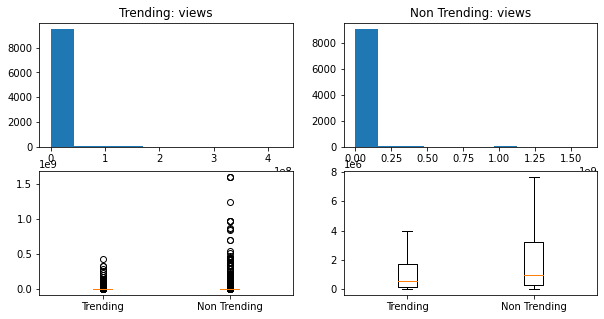

In [108]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

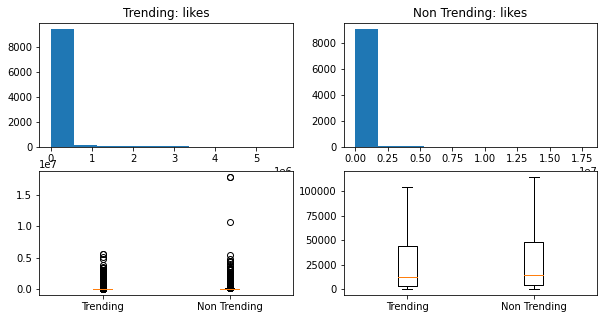

In [109]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

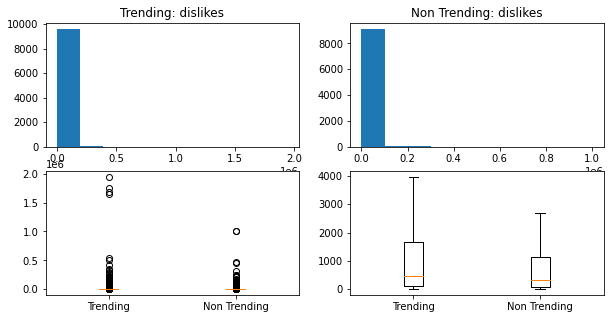

In [110]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

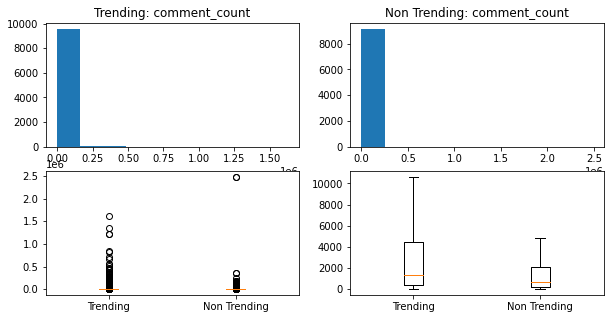

In [111]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

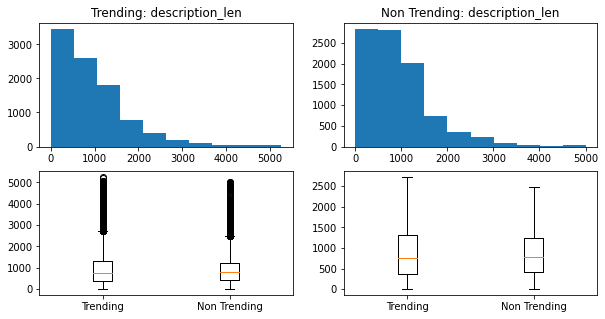

In [112]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

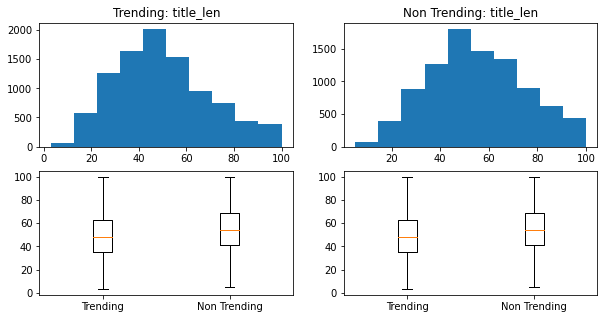

In [113]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

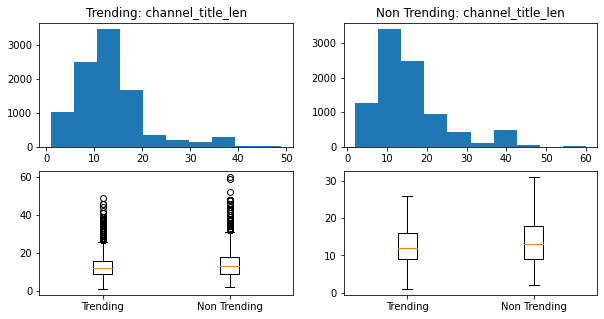

In [114]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)

**Liczba link√≥w**

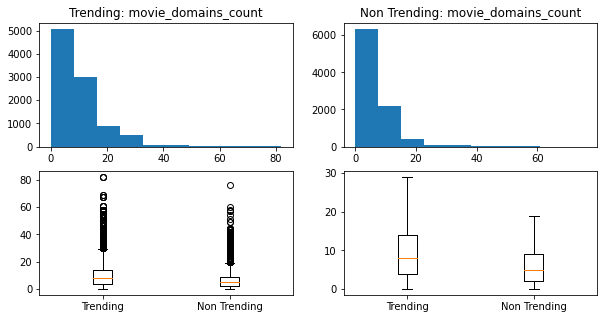

In [115]:
plot_numeric_attr("movie_domains_count", trending_videos, non_trending_videos)

### Atrybuty czasowe

**Dzie≈Ñ opublikowania filmu**

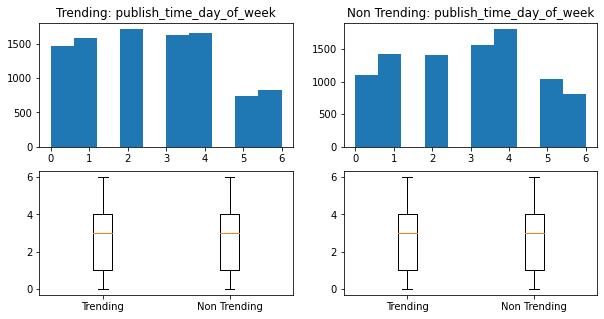

In [116]:
plot_numeric_attr("publish_time_day_of_week", trending_videos, non_trending_videos, )

**Godzina opublikowania filmu**

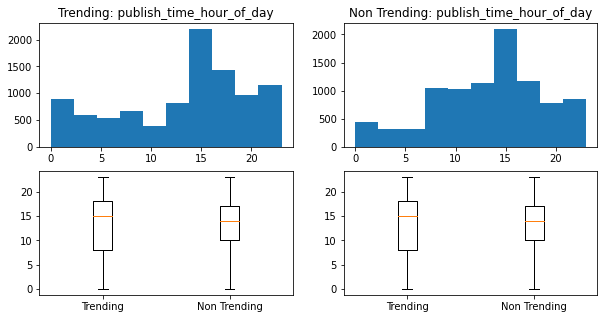

In [117]:
plot_numeric_attr("publish_time_hour_of_day", trending_videos, non_trending_videos)

**Data publikacji**

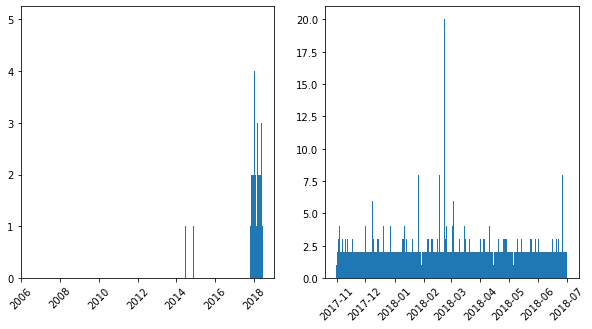

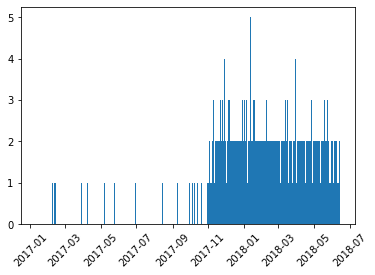

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

trending_publish_time_counts = pd.to_datetime(trending_videos["publish_time"],
                                              format="%Y-%m-%dT%H:%M:%S.%fZ").value_counts()
trending_publish_time_counts = trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

publish_times = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
filtered = publish_times[publish_times >= "2017-01-01"]
filtered_counts = filtered.value_counts().rename_axis("publish_time").reset_index(name="count")

non_trending_publish_time_counts = pd.to_datetime(non_trending_videos["publish_time"],
                                                  format="%Y-%m-%dT%H:%M:%SZ").value_counts()
non_trending_publish_time_counts = non_trending_publish_time_counts.rename_axis("publish_time").reset_index(
    name="count")

axes[0].bar(pd.to_datetime(trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"),
            trending_publish_time_counts["count"])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(pd.to_datetime(non_trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"),
            non_trending_publish_time_counts["count"])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

plt.bar(pd.to_datetime(filtered_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"), filtered_counts["count"])
plt.xticks(rotation=45)
plt.show()

### Atrybuty tekstowe

**Metoda do wy≈õwietlania wykres√≥w**

In [119]:
def plot_tokenized_stats(attr_name):
    us_tokens = load_tokenized_text(f"US_grouped_{attr_name}s")
    gb_tokens = load_tokenized_text(f"GB_grouped_{attr_name}s")
    trending_tokens = []
    trending_words = []
    for i, tokens_list in enumerate(gb_tokens + us_tokens):
        if len(tokens_list) > 0:
            trending_tokens.append(tokens_list[0])
            trending_words += tokens_list[0]
        else:
            trending_tokens.append([])
    trending_words = pd.DataFrame(data={"words": trending_words})
    trending_values_counts = trending_words.value_counts().rename_axis("words").reset_index(name="count")
    tr_head = trending_values_counts.head(50)
    non_trending_path = os.path.join("non_trending", "words")

    gb_non_words = load_csv_file(os.path.join(non_trending_path, f"GB_{attr_name}.csv"))
    us_non_words = load_csv_file(os.path.join(non_trending_path, f"US_{attr_name}.csv"))
    non_trending_words = pd.concat([gb_non_words, us_non_words])
    non_trending_values_counts = non_trending_words.value_counts().rename_axis("words").reset_index(name="count")
    non_tr_head = non_trending_values_counts.head(50)

    plt.subplots(figsize=(18, 5))
    plt.bar(tr_head["words"], tr_head["count"])
    plt.title("Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    plt.subplots(figsize=(18, 5))
    plt.bar(non_tr_head["words"], non_tr_head["count"])
    plt.title("Non Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

**Tytu≈Çy kana≈Ç√≥w - channel_title**

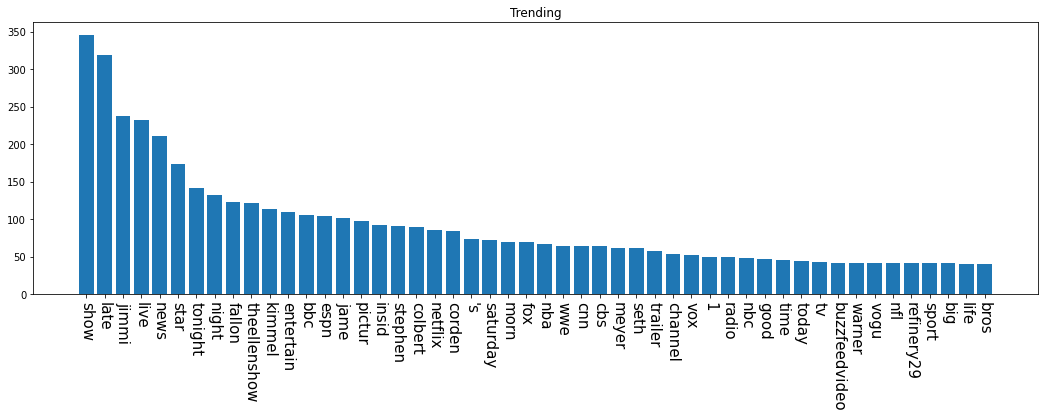

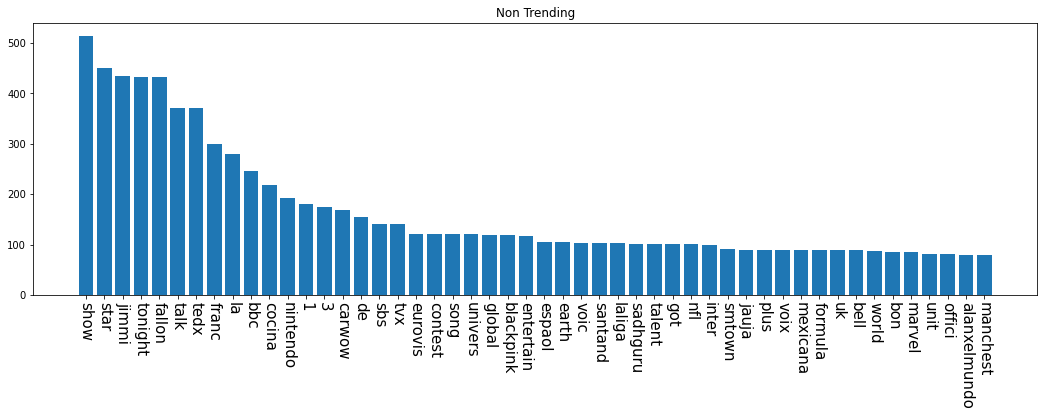

In [120]:
plot_tokenized_stats("channel_title")

**Tytu≈Çy film√≥w - title**

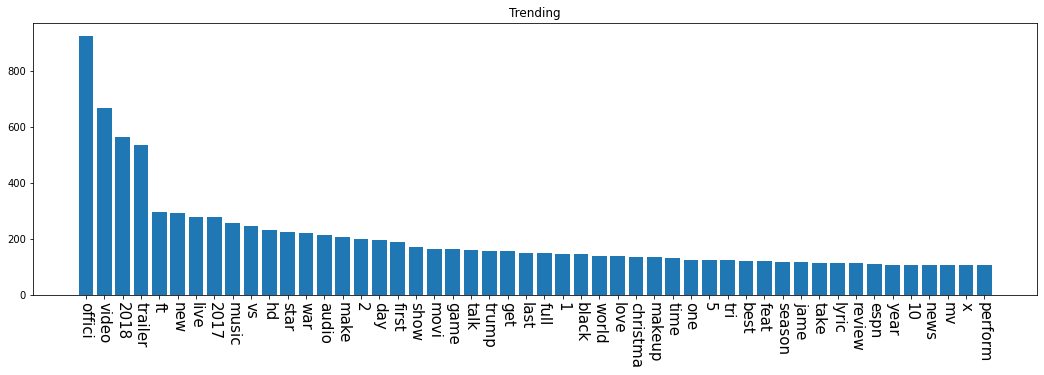

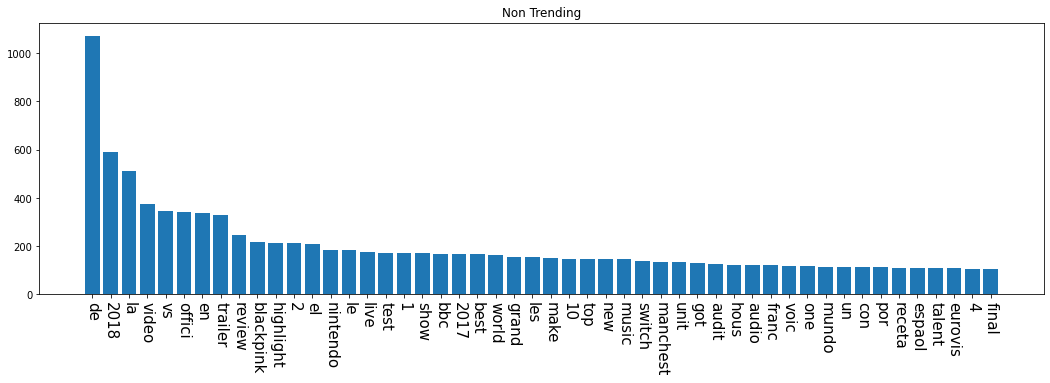

In [121]:
plot_tokenized_stats("title")

**Opisy film√≥w - description**

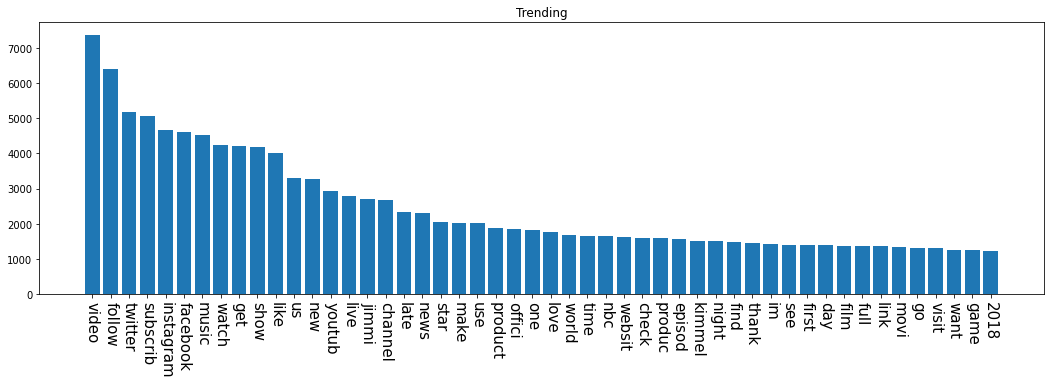

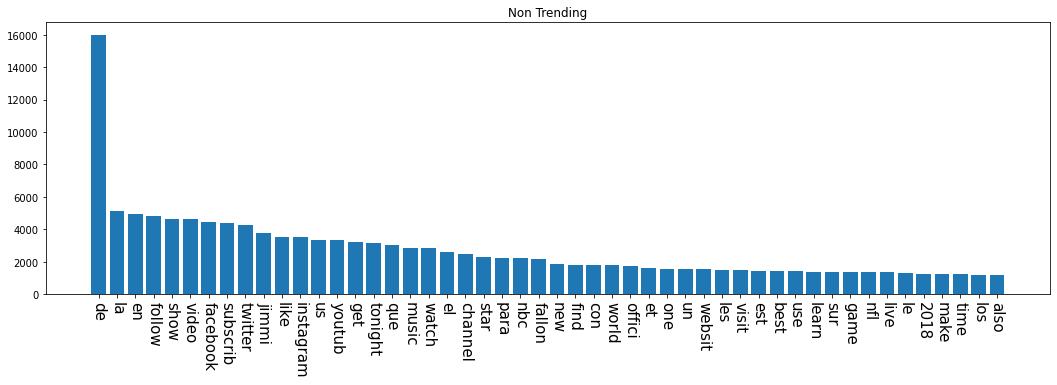

In [122]:
plot_tokenized_stats("description")

**Domeny**

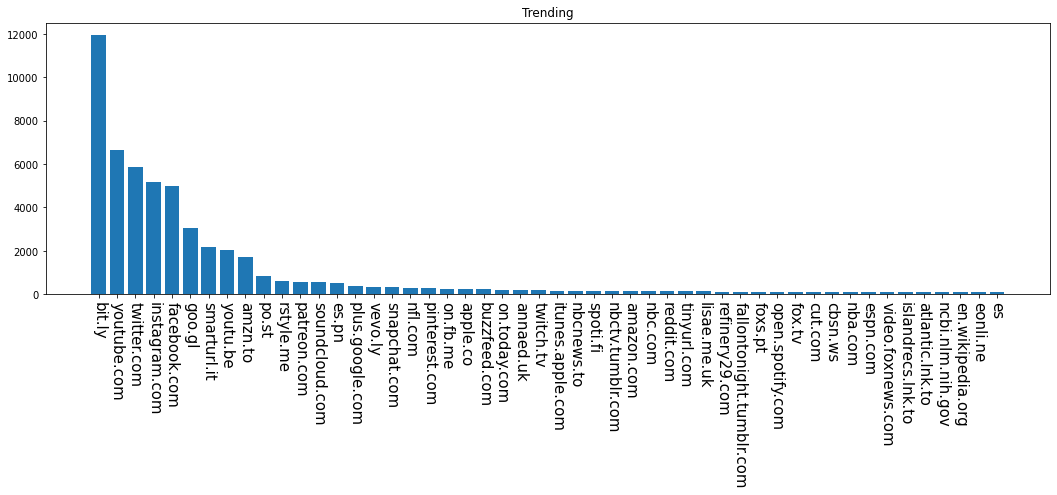

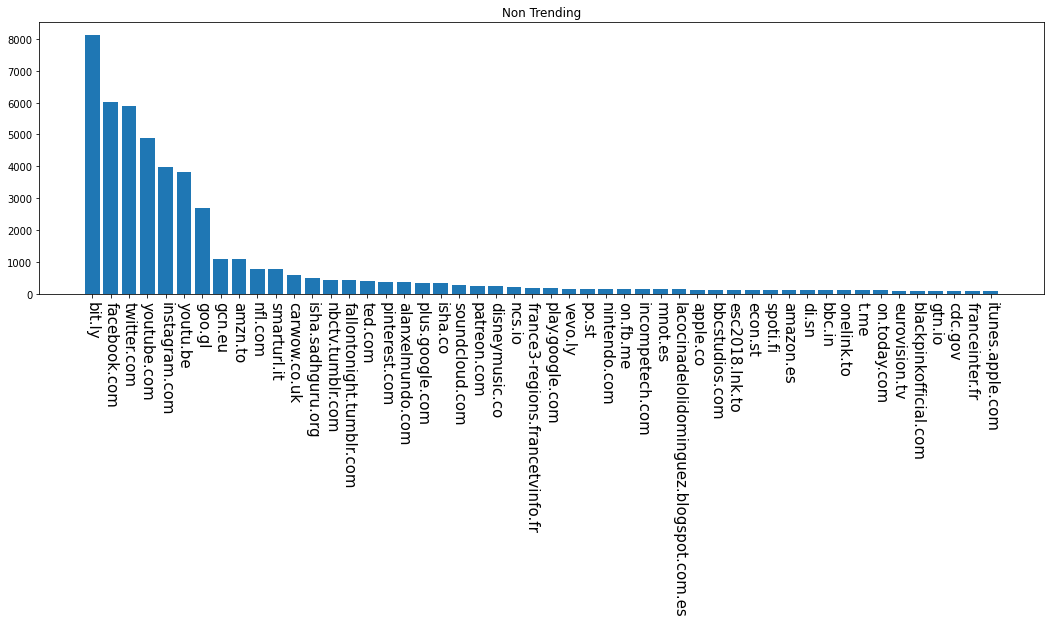

In [123]:
plot_tokenized_stats("domain")

**Tagi**

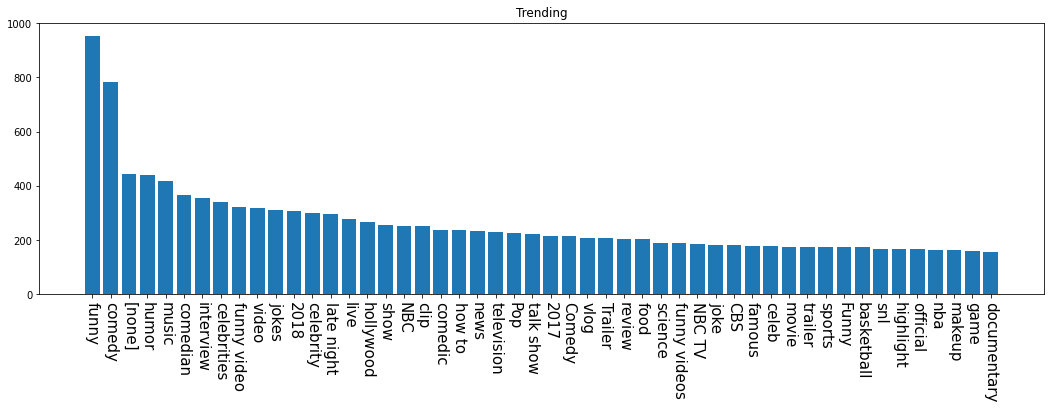

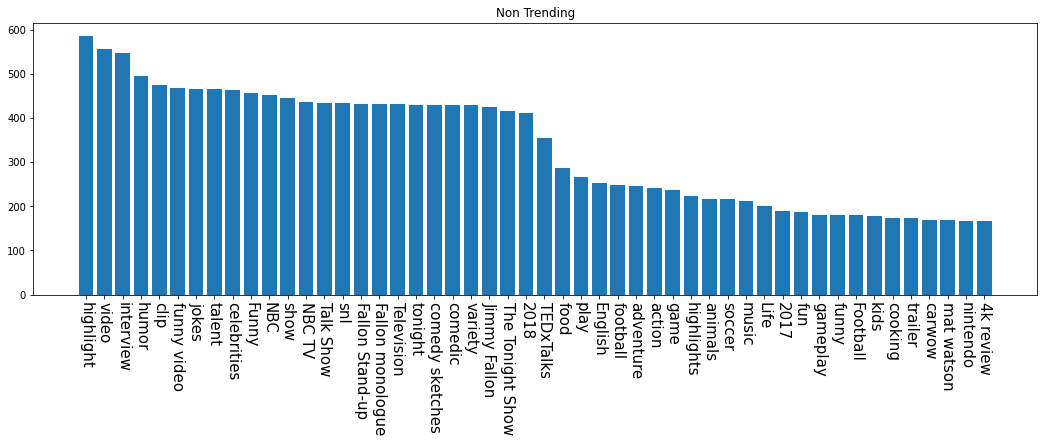

In [124]:
def prepare_tags(tags):
    tags.index = tags.index.droplevel(-1)
    tags.name = "tags"
    tags = tags.to_frame()
    tags_counts = tags.value_counts()
    tags_counts = tags_counts.rename_axis("tag").reset_index(name="count")
    return tags_counts


non_trending_tags = non_trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()
trending_tags = trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()

non_trending_tags = prepare_tags(non_trending_tags)
trending_tags = prepare_tags(trending_tags)

plt.subplots(figsize=(18, 5))
plt.bar(trending_tags["tag"].head(50), trending_tags["count"].head(50))
plt.title("Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

plt.subplots(figsize=(18, 5))
plt.bar(non_trending_tags["tag"].head(50), non_trending_tags["count"].head(50))
plt.title("Non Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

### Podsumowanie wykres√≥w

Podczas analizy danych trending vs non trending, zosta≈Ç zauwa≈ºony pewien problem,
poniewa≈º dane pochodzi≈Çy z konkretnych dni z lat 2017-2018, jednak pobierane statystyki
dla danych non trending pochodzƒÖ z roku 2021. To t≈Çumaczy≈Çoby anomalie takie jak np. wy≈ºsze
liczby wy≈õwietle≈Ñ w filmach non trending. W celu wyeliminowania tego problemu
przeprowadzona zosta≈Ça tak≈ºe analiza z nowo pobranymi statystykami film√≥w trending.

### Wczytanie od≈õwie≈ºonych danych trending

In [125]:
gb_videos, us_videos = load_csv("ped5_trending")
trending_videos = pd.concat([gb_videos, us_videos])
trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

**Views**

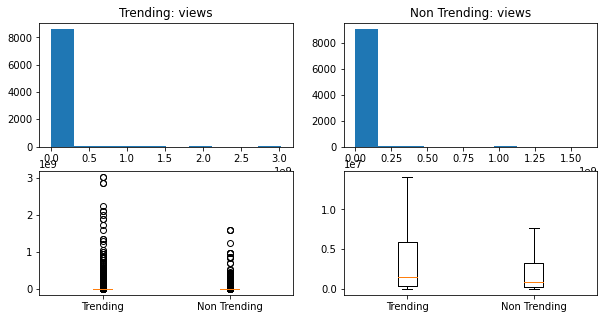

In [126]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

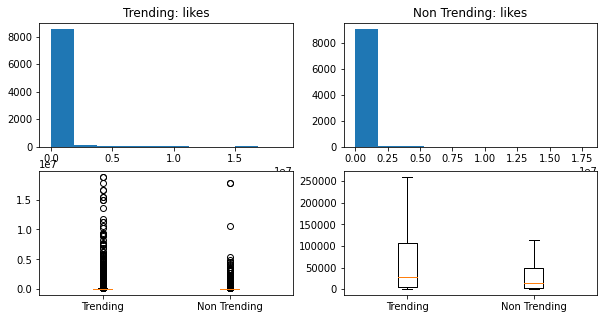

In [127]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

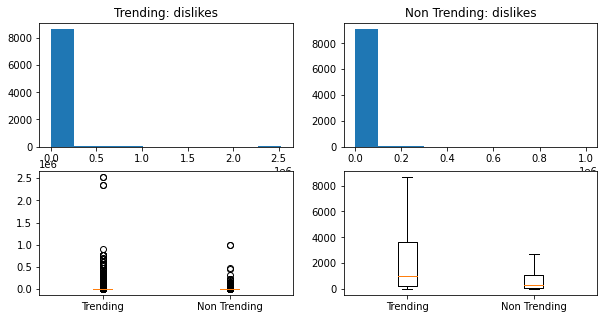

In [128]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

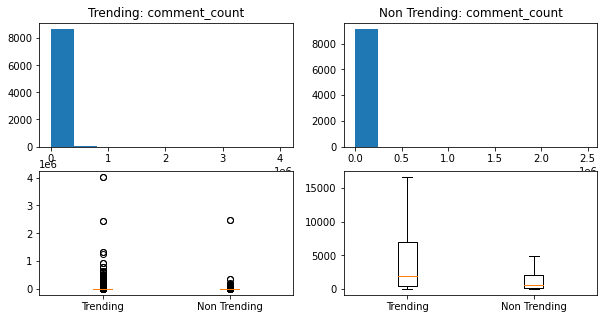

In [129]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

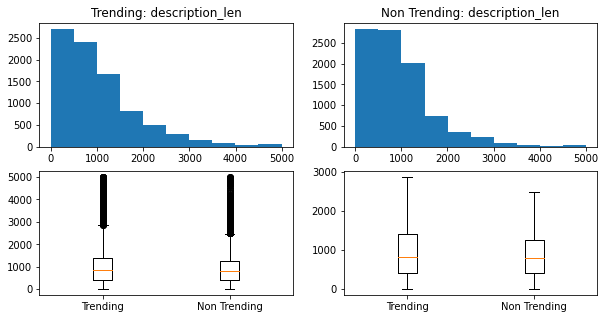

In [130]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

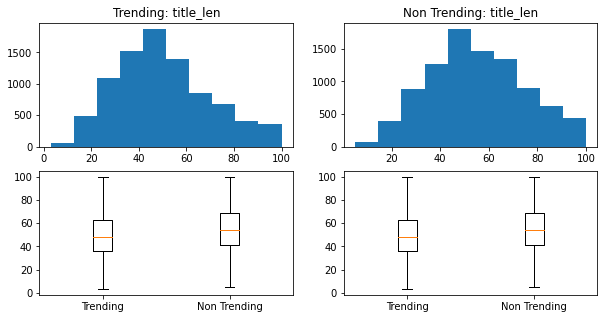

In [131]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

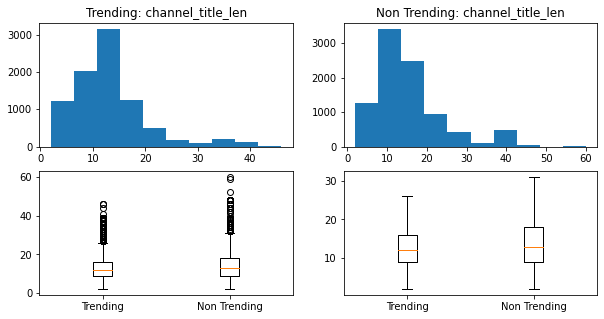

In [132]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)

**Liczba link√≥w**

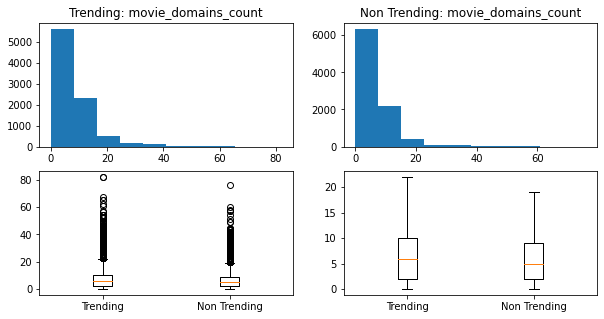

In [133]:
plot_numeric_attr("movie_domains_count", trending_videos, non_trending_videos)

## Ocena atrybut√≥w


### Atrybuty numeryczne

Korelacja atrybut√≥w liczbowych z kategoriƒÖ

Atrybuty numeryczne zosta≈Çy ocenione za pomocƒÖ analizy wariancji (ANOVA Analysis of Variance).
Zastosowana metoda wynika z tego, ≈ºe mamy jednym z atrybut√≥w jest atrybut
nominalny - *category_id*.

Przyjƒôte hipotezy:

$$ H_0 $$: ≈örednie w poszczeg√≥lnych kategoriach sƒÖ takie same.

$$ H_1 $$: ≈örednie w poszczeg√≥lnych kategoriach sƒÖ r√≥≈ºne.


Przyjƒôty poziom istotno≈õci: $$ \alpha = 0.05 $$

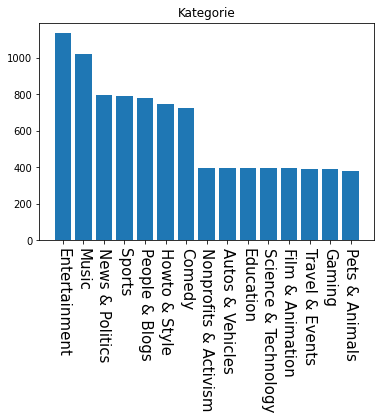

Kategorie Liczba warto≈õci 'nan':0


In [24]:
from helpers.categories import get_categories_dict
from helpers.files import load_csv, save_csv

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]

categories_dict = get_categories_dict()

def plot_categories(title: str, categories_dict: dict, data: pd.DataFrame) -> list:
    nan_count = data["new_category_id"].isna().sum()
    plt.title(title)
    attr_c = data["new_category_id"].value_counts()
    attr_c = attr_c.rename_axis("new_category_id").reset_index(name="count")
    labels = [categories_dict[i] for i in attr_c["new_category_id"]]
    plt.bar(labels, attr_c["count"])
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    print(f"{title} Liczba warto≈õci 'nan':{nan_count}")
    return attr_c["new_category_id"].tolist()

def anova(data: List[pd.DataFrame], attr: str):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    plt.title(attr)
    plt.boxplot(data_set, showfliers=False)
    labels = [categories_dict[i] for i in categories]
    plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
    plt.show()
    return f_score, p_value


categories = plot_categories("Kategorie", categories_dict, non_trending_videos)

views: f_score = 48.05796549132997 p_value = 1.4340532774771592e-129


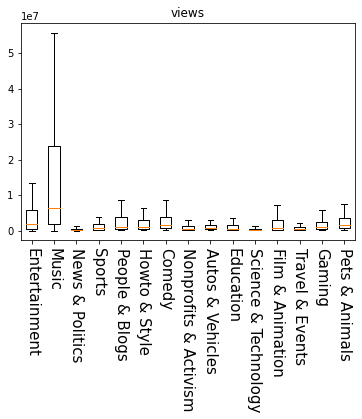

likes: f_score = 45.03148833553995 p_value = 3.866022063545984e-121


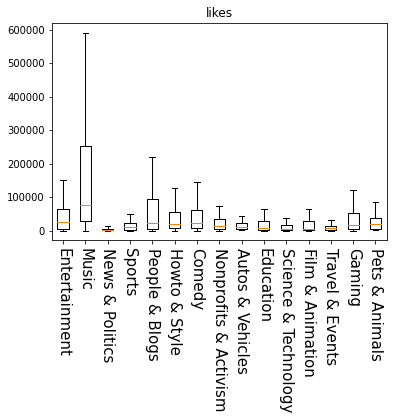

dislikes: f_score = 23.123022494190966 p_value = 1.7617511696478035e-59


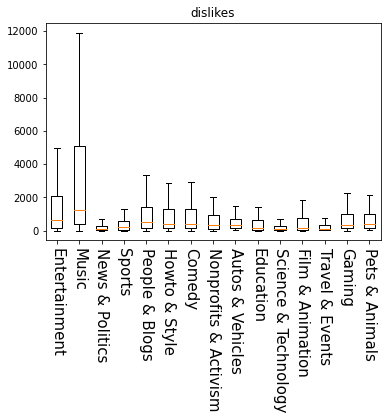

comment_count: f_score = 9.454723287688106 p_value = 3.4312123328641856e-21


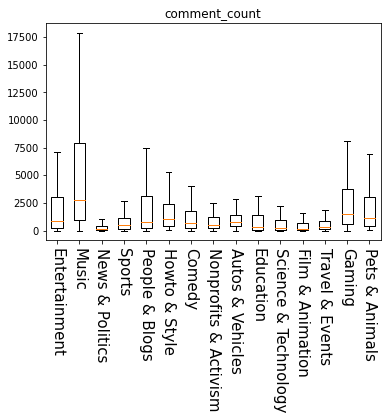

description_len: f_score = 45.5569734664027 p_value = 1.3230394988296587e-122


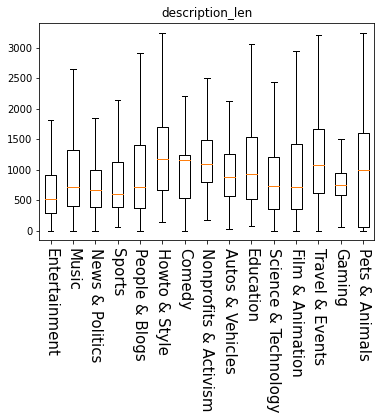

title_len: f_score = 71.85186846287792 p_value = 7.212143778341004e-195


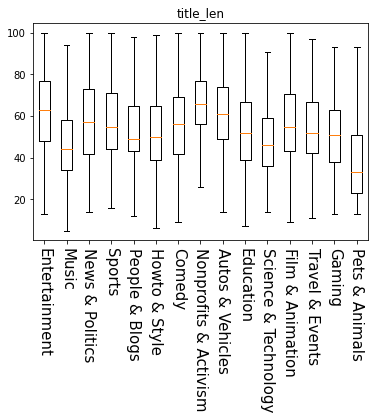

channel_title_len: f_score = 268.76874255187414 p_value = 0.0


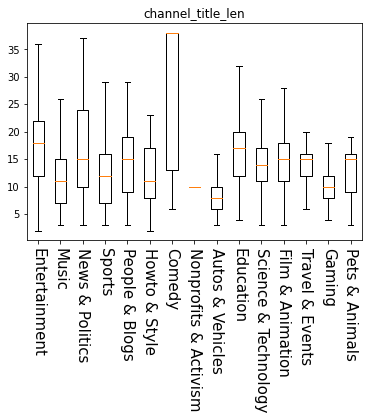

publish_time_day_of_week: f_score = 20.926930716145915 p_value = 2.847742946866234e-53


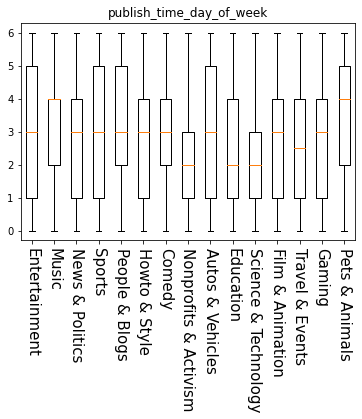

publish_time_hour_of_day: f_score = 63.285092050133386 p_value = 1.4458670367930232e-171


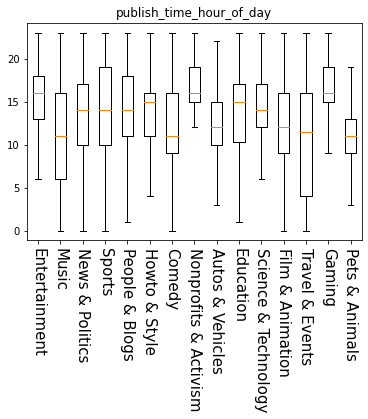

ValueError: could not convert string to float: '2017-11-26T17:00:04Z'

In [28]:
categories_data = []
for category_id in categories:
    c_data = non_trending_videos[non_trending_videos["new_category_id"] == category_id]
    categories_data.append(c_data)

f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(categories_data, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
f_scores

### Ocena atrybut√≥w tekstowych

Po podaniu tekst√≥w procesowi tokenizacji zosta≈Çy wygenerowane dla nich cechy
numeryczne, kt√≥re wyra≈ºajƒÖ liczbƒô wystƒôpujƒÖcych czƒôstych token√≥w przez liczbƒô wszyskich
czƒôsto wystƒôpujƒÖcych token√≥w dla ka≈ºdej kategorii na ka≈ºdym atrybucie.

In [31]:
attr = "channel_titles"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

KeyError: 'freq_channel_titles_Entertainment'

In [9]:
trending_videos.columns

Index(['new_video_id', 'Unnamed: 0.1', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'views',
       ...
       'freq_tags_Sports', 'freq_tags_Travel & Events', 'freq_tags_Gaming',
       'freq_tags_Education', 'freq_tags_Pets & Animals',
       'freq_tags_Science & Technology', 'freq_tags_Film & Animation',
       'freq_tags_Autos & Vehicles', 'freq_tags_Nonprofits & Activism',
       'freq_tags_Shows'],
      dtype='object', length=164)

In [10]:
non_trending_videos.columns

Index(['video_id', 'title', 'channel_title', 'new_category_id', 'publish_time',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'description_len', 'title_len', 'channel_title_len',
       'publish_time_day_of_week', 'publish_time_hour_of_day',
       'movie_domains_count'],
      dtype='object')

In [18]:
non_trending_videos

video_id                                              title  \
0     Ys9ziXRfEMw  Delusional Owner‚Äôs ‚Äò$300k' Art Collection Is A...   
1     jO2HEVc5iK4  When Michael Jackson called Zac Efron - The Gr...   
2     yZ3GlUDdrqg  Jurassic World: Fallen Kingdom - Trailer Thurs...   
3     bHBDXe96wbg  Delivery man Liam Payne sings in an elevator -...   
4     c1r6rCp8heA  Weird Owner Leaves Threatening Notes All Over ...   
...           ...                                                ...   
4515  Xdhmgp4IUL0  Don't Believe Everything You Think | Lauren We...   
4516  EZ1ncb_qoA8  Come uscire dalla comfort zone del forse | Fra...   
4517  vTpLtNdXDgk    El poder de decir S√ç | Juan Lombana | TEDxUDLAP   
4518  xrWvPo-KaVs  How to 'overcome' fear | Trevor Ragan | TEDxCe...   
4519  KeMW2Asu8vg  What Being Autistic Taught Me About Being Huma...   

           channel_title  new_category_id          publish_time  \
0          Gordon Ramsay               24  2017-11-26T17:00:04Z   
1                    BBC               24  2017-12-29T13:00:05Z   
2     Universal Pictures               24  2017-12-05T21:37:25Z   
3                    BBC               24  2017-11-03T20:13:18Z   
4          Gordon Ramsay               24  2017-11-05T16:30:01Z   
...                  ...              ...                   ...   
4515          TEDx Talks               29  2018-06-05T19:55:22Z   
4516          TEDx Talks               29  2018-05-31T18:09:43Z   
4517          TEDx Talks               29  2018-05-21T15:29:37Z   
4518          TEDx Talks               29  2018-06-14T18:45:22Z   
4519          TEDx Talks               29  2018-05-04T16:57:46Z   

                                                   tags     views   likes  \
0     Gordon Ramsay|Gordon Ramsay recipe|Gordon Rams...   6094689   74409   
1     BBC|iPlayer|gary oldman|zac efron|michael jack...   1374448   25103   
2     Jurassic World|Fallen Kingdom|Jurassic Park|T-...  13974178  195773   
3     BBC|iPlayer|bbc1|bbc 1|bbc one|liam payne|cher...   4219553   81171   
4     Gordon Ramsay|Gordon Ramsay recipe|Gordon Rams...  16753371  196866   
...                                                 ...       ...     ...   
4515  TEDxTalks|English|Life|Behavior|Change|Communi...   1660503   30893   
4516              TEDxTalks|Italian|Life|Choice|Success    644395   23909   
4517  TEDxTalks|Spanish|Business|Digital|Entrepreneu...     49767    2037   
4518  TEDxTalks|English|Education|Behavior|Fear|Grit...    167500    4108   
4519  TEDxTalks|English|Health|Brain|Childhood|Conne...    111840    3921   

      dislikes  comment_count  ... comments_disabled  ratings_disabled  \
0         1247           6137  ...             False             False   
1          156            677  ...             False             False   
2         6608           6101  ...             False             False   
3         1072           1392  ...             False             False   
4         3941          11784  ...             False             False   
...        ...            ...  ...               ...               ...   
4515       824            799  ...             False             False   
4516       642            626  ...             False             False   
4517        34             47  ...             False             False   
4518        79            165  ...             False             False   
4519        45            307  ...             False             False   

      video_error_or_removed  \
0                      False   
1                      False   
2                      False   
3                      False   
4                      False   
...                      ...   
4515                   False   
4516                   False   
4517                   False   
4518                   False   
4519                   False   

                                            description description_len  \
0     Just a little off his estimates.\n\n#GordonRam...     